# Data Sales Analysis

#### Berikut adalah data hasil penjualan selama tahun 2019. Saya akan mencoba untuk menganalisis data untuk mencari tahu:
1. Apa bulan dengan pendapatan penjualan tertinggi?
2. Apa Kota dengan pendapatan penjualan tertinggi?
3. Waktu terbaik untuk menampilkan iklan, berdasarkan jam dimana konsumen paling sering membelian produk.
4. Product dengan penjualan terbanyak.


#### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Import Data

In [2]:
df1 = pd.read_csv('Sales_April_2019.csv')
df2 = pd.read_csv('Sales_May_2019.csv')
df3 =pd.read_csv('Sales_January_2019.csv')
df4 =pd.read_csv('Sales_February_2019.csv')
df5 =pd.read_csv('Sales_March_2019.csv')
df6 =pd.read_csv('Sales_June_2019.csv')
df7 =pd.read_csv('Sales_July_2019.csv')
df8 =pd.read_csv('Sales_August_2019.csv')
df9 =pd.read_csv('Sales_September_2019.csv')
df10 =pd.read_csv('Sales_October_2019.csv')
df11 =pd.read_csv('Sales_November_2019.csv')
df12 =pd.read_csv('Sales_December_2019.csv')

#### Cleaning Data

In [3]:
df_gabungan = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

is_NaN = df_gabungan.isnull()
row_has_NaN = is_NaN.any(axis=1)
row_with_NaN = df_gabungan[row_has_NaN]

df_str = df_gabungan[df_gabungan['Order Date']=='Order Date']

#### Menghilangkan Nan dan string Value

In [4]:
df_nonNan = df_gabungan.dropna(how='all')

In [5]:
df = df_nonNan.drop([i for i in df_str.index])

In [6]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

<ipython-input-6-1da51c38df1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
<ipython-input-6-1da51c38df1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'])


##### Menambahkan Kolom Baru yaitu Month dan Sales

In [7]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

<ipython-input-7-3eed6fd5bfb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered']*df['Price Each']


In [8]:
df['Month'] = df['Order Date'].str[0:2]

<ipython-input-8-c722bfc7d93b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].str[0:2]


In [9]:
df.to_csv('Clean Data.csv', index=False)

#### Melakukan pengelompokkan berdasarkan Bulan

In [10]:
Hasil = df.groupby(by='Month', axis=0).sum()
Hasil

,Quantity Ordered,Price Each,Sales
Month,,,
01,10670,1.776156e+06,1.786511e+06
02,13162,2.145209e+06,2.158127e+06
03,16697,2.740393e+06,2.755969e+06
04,20226,3.313522e+06,3.336376e+06
05,18344,3.084756e+06,3.101881e+06
06,14964,2.508863e+06,2.524465e+06
07,15781,2.572765e+06,2.587445e+06
08,13185,2.178184e+06,2.191698e+06
09,12827,2.038020e+06,2.050361e+06


### 1. Apa bulan dengan pendapatan penjualan tertinggi?

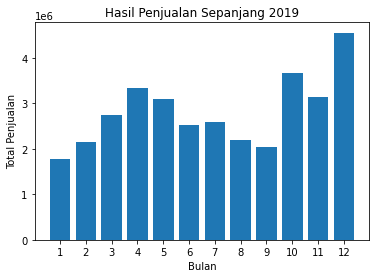

In [11]:
x = range(1,13)
y = Hasil['Sales']


plt.bar(x,y)
plt.xticks(x)
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.title('Hasil Penjualan Sepanjang 2019')

plt.show()

#### Kesimpulan: Berdasarkan hasil pengolahan data, dapat disimpulkan bahwa total penjualan terbesar terjadi di bulan Desember, disusul bulan Oktober dan April.

### 2. Apa kota dengan penjualan tertinggi?

In [12]:
# Menambahkan kolom Kota
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

<ipython-input-12-765f91245aca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])


In [21]:
df_groupped_by_city = df.groupby(by='City',axis=0).sum()

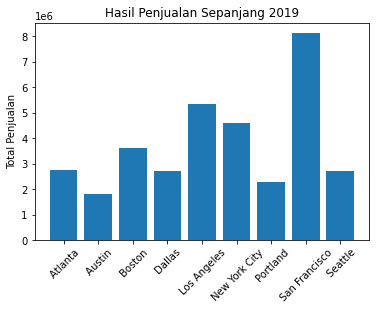

In [15]:
x = df_groupped_by_city.index
y = df_groupped_by_city['Sales']


plt.bar(x,df_groupped_by_city['Sales'])
plt.xticks(x, rotation=45)
plt.ylabel('Total Penjualan')
plt.title('Hasil Penjualan Sepanjang 2019')

plt.show()

#### Kesimpulan 2 : Kota dengan penjualan terbanyak adalah San francisco

## 3. Kapan waktu terbaik untuk menampilkan iklan?

In [16]:
#Menambahkan kolom jam
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df['Total Frekuensi']=1

<ipython-input-16-dbca713e4778>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-16-dbca713e4778>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour
<ipython-input-16-dbca713e4778>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [17]:
df_groupped_by_hour = df.groupby(by='Hour',axis=0).sum()

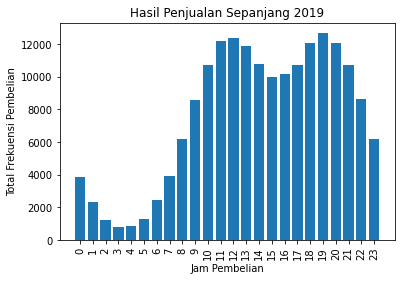

In [18]:
x = df_groupped_by_hour.index
y = df_groupped_by_hour['Total Frekuensi']


plt.bar(x,df_groupped_by_hour['Total Frekuensi'])
plt.xticks(x, rotation=90)
plt.xlabel ('Jam Pembelian')
plt.ylabel('Total Frekuensi Pembelian')
plt.title('Hasil Penjualan Sepanjang 2019')

plt.show()

#### Kesimpulan : Waktu terbaik untuk menampilkan iklan adalah jam 11-13 dan jam 18-20, bila dilihat dari frekuensi pembelian

### 4. Product apa yang terjual paling banyak?

In [22]:
df_groupped_by_product = df.groupby(by='Product', axis=0).sum()

<ipython-input-20-c68801dbdeb7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

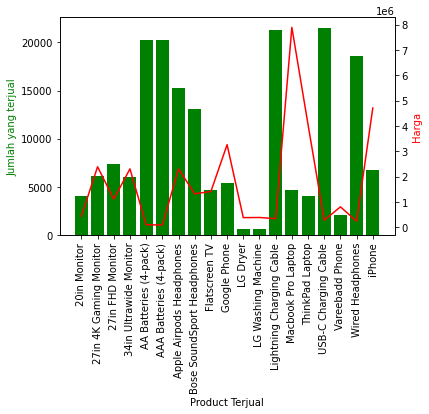

In [20]:
x = df_groupped_by_product.index
y = df_groupped_by_product['Total Frekuensi']
y2 = df_groupped_by_product['Sales']


fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(x, y, color = 'g')
ax2.plot(x,y2, color = 'r')

ax.set_xlabel('Product Terjual')
ax.set_ylabel('Jumlah yang terjual', color='g')
ax2.set_ylabel('Harga', color='r')
ax.set_xticklabels(x, rotation=90)

#### Kesimpulan : produk yang paling banyak terjual adalah USB-C Charging Cable, Lightning Charging Cable, AAA batteries (4-pack), dan AA batteries (4-pack)